# Correlation

Check correlation matrix of variables

In [11]:
import pandas as pd
import os 
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
sns.set_theme(style="whitegrid", palette=sns.husl_palette(l=.4, n_colors=3), font_scale=0.8, context="paper")

Load data

In [19]:
datasetTimepoint = "12_uponAdmission"
target = "disease_severity"
dataPath = "../../results/preprocessing"
data = pd.read_csv(f"{dataPath}/{datasetTimepoint}.csv", index_col=0)   #12_beforeAdmission

#### Feature selection:
vars = "clinical+bestSterols"    # boruta+bestSterols
varPath = f"../../results/featureSelection/{datasetTimepoint}/{vars}.txt"
sel_variables = pd.read_csv(varPath, header=None)[0].tolist()

### Parse vars
data = data.loc[:, sel_variables]

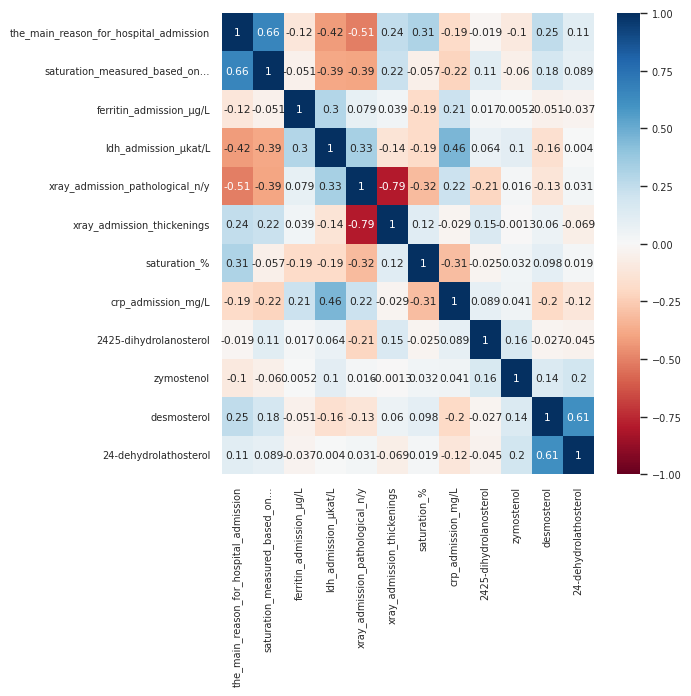

In [24]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(data.corr(), 
        xticklabels=data.columns,
        yticklabels=data.columns,
        cmap="RdBu", 
        annot=True,
        vmin=-1, vmax=1,
        ax=ax)
plt.tight_layout()
fig.savefig("../../figures/correlation_clinical+bestSterols.png", dpi=300)

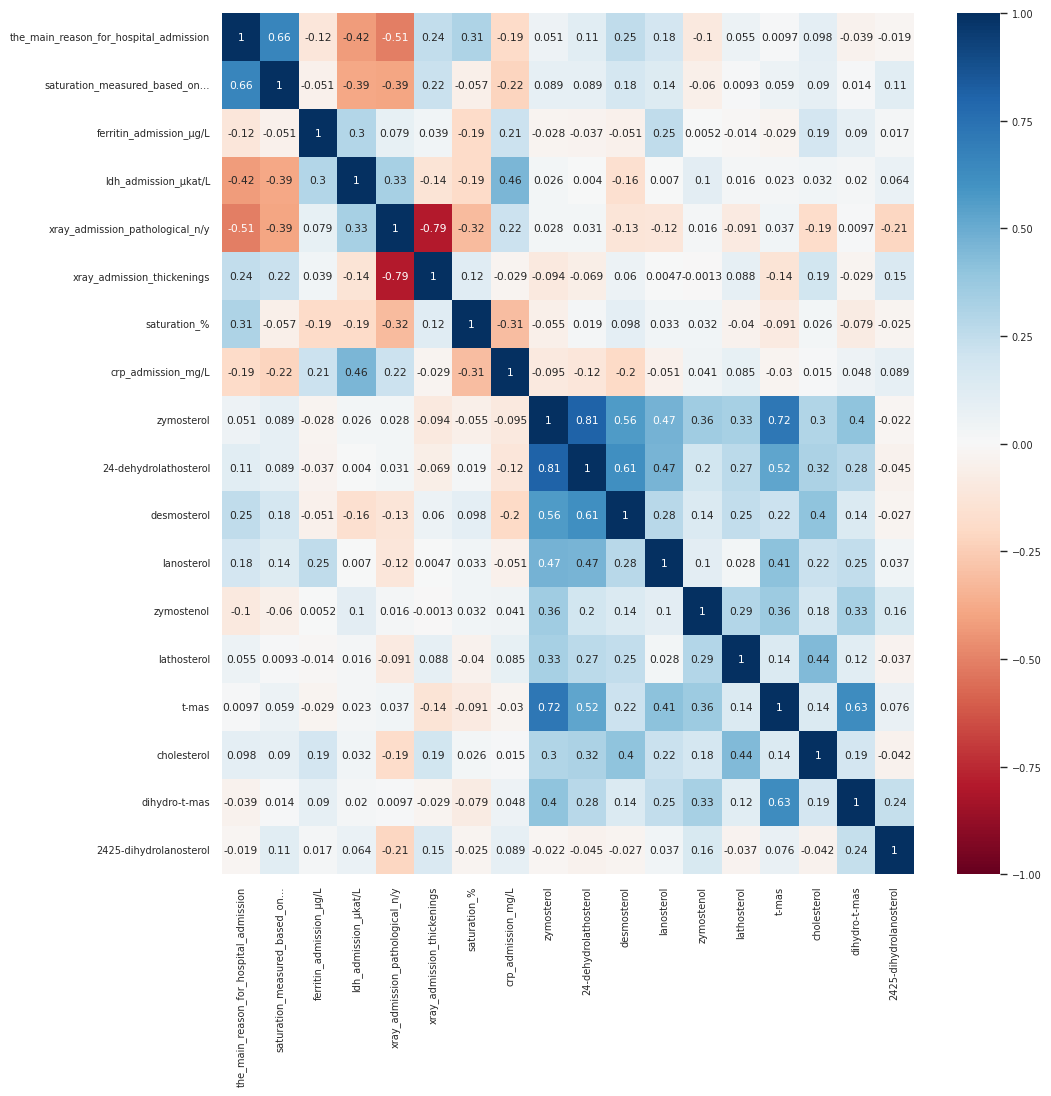

In [29]:
fig, ax = plt.subplots(figsize=(11,11))

''' Dataset curation'''
data2 = pd.read_csv(f"{dataPath}/{datasetTimepoint}.csv", index_col=0)   #12_beforeAdmission
vars = "clinical+allSterols"    # boruta+bestSterols
varPath = f"../../results/featureSelection/{datasetTimepoint}/{vars}.txt"
sel_variables = pd.read_csv(varPath, header=None)[0].tolist()
data2 = data2.loc[:,sel_variables]

sns.heatmap(data2.corr(), 
        xticklabels=data2.columns,
        yticklabels=data2.columns,
        cmap="RdBu", 
        annot=True,
        vmin=-1, vmax=1,
        ax=ax)
plt.tight_layout()
fig.savefig("../../figures/correlation_clinical+allSterols.png", dpi=300)